In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

df = pd.DataFrame(columns=["吸光度"], index=['0', '2', '5', '10'])
df['吸光度'] = np.array([-0.038, 0.239, 0.667, 0.923]) - -0.038

df

array([[13.937542],
       [14.644314]], dtype=float32)

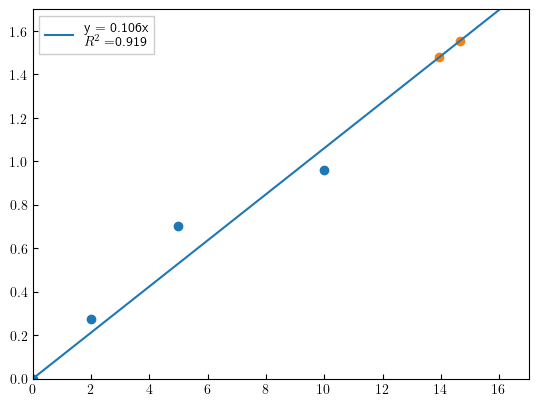

In [10]:
X = df.index.values.astype(np.float32)
Y = df['吸光度'].values.astype(np.float32)
abs = np.array([1.479, 1.554], dtype=np.float32).reshape(-1,1)

model = LinearRegression(fit_intercept=False).fit(X.reshape(-1,1), Y.reshape(-1,1))
pred_Y = model.predict(np.arange(20).reshape(-1,1))


plt.xlim(0,17)
plt.ylim(0,1.7)
plt.scatter(X, Y)
plt.plot(np.arange(20), pred_Y, label=f'''y = {model.coef_.item():.3f}x
$R^2=${model.score(X.reshape(-1,1), Y.reshape(-1,1)):.3f}''')
plt.scatter(abs/model.coef_, abs)


plt.legend()
abs/model.coef_.item()

In [24]:
df_sample = pd.DataFrame()
df_sample[r"吸光度"] = abs.flatten()
df_sample[r"濃度[mg/ml]"] = (abs/model.coef_).flatten()
df_sample

with pd.ExcelWriter("pre-gr.xlsx") as writer: 
    df.to_excel(writer, index=None, sheet_name="absorbance")
    df_sample.to_excel(writer, index=None, sheet_name="sample-data")